# Import Libraries

In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

import time
from datetime import datetime, timedelta, timezone
import pytz

import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Data from Jobstreet

In [57]:
def scraping_data(key, num_pages):
    base_url = 'https://www.jobstreet.co.id'
    # list untuk menyimpan data
    data = []

    # Looping untuk setiap halaman
    for page in range(1, num_pages + 1):

        url = f'{base_url}/id/{key}?page={page}'

        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        #a_tags = soup.find_all('a', attrs={'data-automation': 'job-list-view-job-link'})
        a_tags= soup.select('a[data-automation="job-list-view-job-link"]') #menggunakan CSS selector
        href_list = [a.get('href') for a in a_tags]

        for href_value in href_list:
            full_url = base_url + href_value
            job_response = requests.get(full_url)

            job_soup = BeautifulSoup(job_response.text, 'html.parser')

            job_title = job_soup.find('h1').text.strip()
            company_name = job_soup.find('span', class_='lnocuod', attrs={'data-automation': 'advertiser-name'}).text.strip()
            job_description = job_soup.find('div', {'data-automation': 'jobAdDetails'}).get_text(strip=True)
            job_type = job_soup.find_all('span', class_='_1wkzzau0 a1msqi4y a1msqir')[2].text.strip()

            data.append({'Job Title': job_title, 'Company': company_name,
                         'Job Description': job_description, 'Job Type': job_type})

    df = pd.DataFrame(data)
    return df

df = scraping_data('data-science-jobs', num_pages=6)
df

,Job Title,Company,Job Description,Job Type
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu
...,...,...,...,...
187,Data Analyst Risk,Company Confidential,We are looking for a Collection Analyst to ide...,Penuh waktu
188,Data Analyst Coordinator (Siantar Top),Company Confidential,Job description & requirements🙌🏻About UsPT Sia...,Penuh waktu
189,DATA ENGINEER (Fastrata Buana (Kapal Api Group)),Company Confidential,Job description & requirements🙌🏻About UsPT. Fa...,Penuh waktu
190,Data Analyst,PT Trinusa Travelindo,It's fun to work in a company where people tru...,Penuh waktu


In [58]:
def check_skills(description, skills):
    description_lower = description.lower()
    found_skills = []

    for skill in skills:
        # Ganti 'Google Cloud Platform' dengan 'GCP' dan tambahkan '|'
        skill_pattern = re.escape(skill.lower()).replace('google cloud platform', 'GCP')
        pattern = r'\b{}\b'.format(skill_pattern)
        if re.search(pattern, description_lower):
            found_skills.append(skill)

    return found_skills if found_skills else ['Unknown']

def add_columns(df, skills, column_name):
    df[column_name] = df['Job Description'].apply(lambda x: check_skills(x, skills))
    return df

# Keterampilan yang ingin diperiksa
list_skills = ['SQL','Python','R','Javascript', 'C#','C++',
               'MySQL','Postgres','Azure','Database','AWS','GCP','Machine Learning',
               'OpenCV','tensorflow','Deep learning','scikit-learn','pandas',
               'CI/CD','MLOps','WandB','Neptune','Kubernetes','docker',
               'NoSQL','MongoDB','Hadoop','spark','Hive','MapReduce','kafka','Git','Airflow','talend',
               'Excel']


add_columns(df, list_skills, column_name='Skills')

,Job Title,Company,Job Description,Job Type,Skills
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]"
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]"
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown]
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]"
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi..."
...,...,...,...,...,...
187,Data Analyst Risk,Company Confidential,We are looking for a Collection Analyst to ide...,Penuh waktu,[SQL]
188,Data Analyst Coordinator (Siantar Top),Company Confidential,Job description & requirements🙌🏻About UsPT Sia...,Penuh waktu,[Unknown]
189,DATA ENGINEER (Fastrata Buana (Kapal Api Group)),Company Confidential,Job description & requirements🙌🏻About UsPT. Fa...,Penuh waktu,"[SQL, Python, MySQL, Azure, Database, AWS, Mac..."
190,Data Analyst,PT Trinusa Travelindo,It's fun to work in a company where people tru...,Penuh waktu,"[Python, R]"


In [59]:
list_viz_tools = ['tableau', 'power bi','QlikView','looker', 'kibana',
                  'matplotlib', 'seaborn', 'plotly', 'bokeh']
df = add_columns(df, list_viz_tools,column_name='Visualization Tools')
df

,Job Title,Company,Job Description,Job Type,Skills,Visualization Tools
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]",[Unknown]
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]",[Unknown]
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown],[Unknown]
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]",[power bi]
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi...",[Unknown]
...,...,...,...,...,...,...
187,Data Analyst Risk,Company Confidential,We are looking for a Collection Analyst to ide...,Penuh waktu,[SQL],[Unknown]
188,Data Analyst Coordinator (Siantar Top),Company Confidential,Job description & requirements🙌🏻About UsPT Sia...,Penuh waktu,[Unknown],[Unknown]
189,DATA ENGINEER (Fastrata Buana (Kapal Api Group)),Company Confidential,Job description & requirements🙌🏻About UsPT. Fa...,Penuh waktu,"[SQL, Python, MySQL, Azure, Database, AWS, Mac...",[power bi]
190,Data Analyst,PT Trinusa Travelindo,It's fun to work in a company where people tru...,Penuh waktu,"[Python, R]",[looker]


In [60]:
df.loc[158,'Skills']

['Python', 'Machine Learning', 'tensorflow', 'Deep learning', 'scikit-learn']

In [61]:
target_skill = 'Python'

# Menghitung jumlah kemunculan 'Python' dalam kolom 'Skills'
python_count = df['Skills'].apply(lambda x: x.count(target_skill)).sum()

print(f"Jumlah kemunculan 'Python' dalam kolom 'Skills': {python_count}")

Jumlah kemunculan 'Python' dalam kolom 'Skills': 71


In [62]:
# Mendapatkan offset waktu lokal
local_offset = -time.timezone if (time.localtime().tm_isdst == 0) else -time.altzone
local_timezone = timezone(timedelta(seconds=local_offset))

# Mencetak informasi zona waktu
print(f"Local Timezone: {time.tzname[0]}")
print(f"Local Offset: {local_offset / 3600:.2f} hours")

# Mencetak waktu sekarang
current_time = datetime.now(local_timezone)
print(f"Current Time: {current_time} ({current_time.tzinfo})")

Local Timezone: WIB
Local Offset: 7.00 hours
Current Time: 2023-12-13 08:15:48.207957+07:00 (UTC+07:00)


In [63]:
# Menentukan zona waktu Indonesia
indonesia_timezone = pytz.timezone('Asia/Jakarta')
current_time = datetime.now(indonesia_timezone).strftime('%Y-%m-%d_%H-%M-%S')

In [64]:
file_name = f"job-{current_time}.csv"
df.to_csv(file_name, index=False)

# EDA (Exploratory Data Analysis)

In [65]:
# Menggabungkan semua skills menjadi satu list
all_skills = [skill for sublist in df['Skills'] for skill in sublist]

# Menghitung frekuensi setiap skills
skill_counts = pd.Series(all_skills).value_counts()

print(all_skills[:6])
print(skill_counts.head())

['SQL', 'Python', 'Azure', 'SQL', 'R', 'Excel']
SQL         73
Python      71
Database    49
Excel       41
Unknown     40
Name: count, dtype: int64


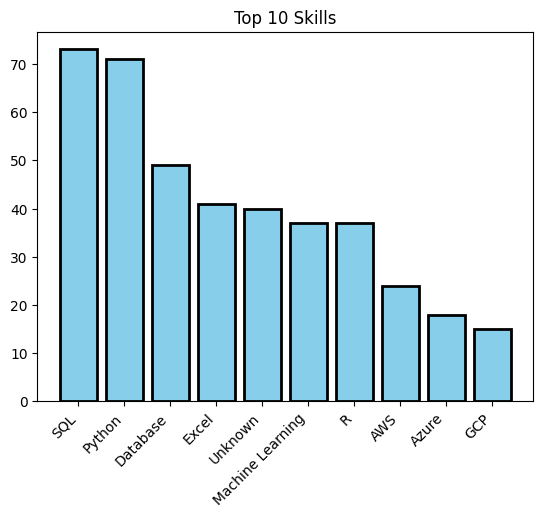

In [66]:
# Membuat plot bar chart
top_10_skills= skill_counts.head(10)
plt.bar(top_10_skills.index, top_10_skills.values,
        color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
# plt.xlabel('Skills')
# plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

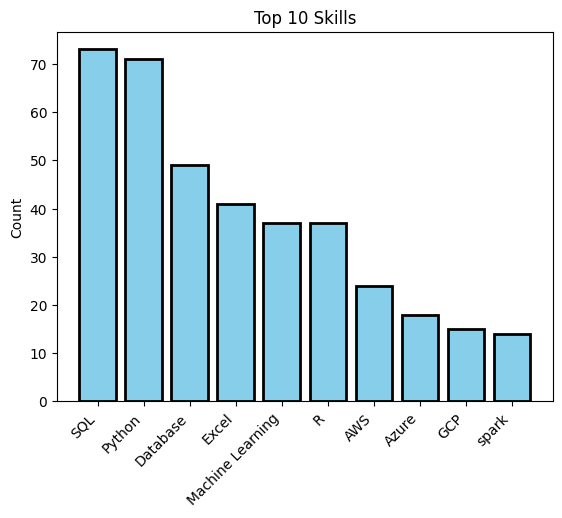

In [67]:
# Menghapus nilai 'unknown' dari perhitungan
skill_counts = skill_counts[skill_counts.index != 'Unknown']

# Membuat plot bar chart (ambil 10 teratas)
plt.bar(skill_counts.index[:10], skill_counts.values[:10], color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [68]:
# viz_tools = []

# for sub_vt in df['Visualization Tools']:
#     for vt in sub_vt:
#         viz_tools.append(vt)

In [69]:
viz_tools = [vt for sub_viz_tools in df['Visualization Tools'] for vt in sub_viz_tools]

# Menghitung frekuensi setiap viz_tools
vt_counts = pd.Series(viz_tools).value_counts()
vt_counts = vt_counts[vt_counts.index != 'Unknown']

print(viz_tools[:6])
print(vt_counts.head())

['Unknown', 'Unknown', 'Unknown', 'power bi', 'Unknown', 'Unknown']
tableau       39
power bi      32
looker         9
matplotlib     5
plotly         2
Name: count, dtype: int64


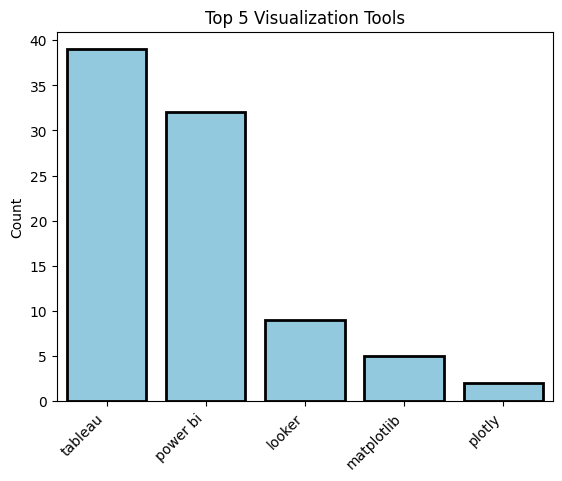

In [70]:
top_tools = vt_counts.head(5)

sns.barplot(x=top_tools.index, y=top_tools.values, color='skyblue', edgecolor='black', linewidth=2)
plt.title('Top 5 Visualization Tools')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()